In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv")
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

<AxesSubplot:>

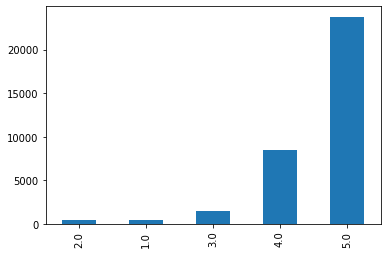

In [4]:
df["reviews.rating"].value_counts().sort_values().plot.bar()

In [5]:
df["reviews.text"] = df["reviews.text"].replace(["\:\)", "\:\-\)", "\:\-\}", "\;\-\}", "\:\-\>", "\;\-\)"], ["Happy","Happy","Happy","Happy","Happy","Happy"], regex=True)
df["reviews.text"] = df["reviews.text"].replace(["\:\-\(", "\:\(", "\:\-\|", "\;\-\(", "\;\-\<", "\|\-\{"], ["Sad", "Sad", "Sad", "Sad", "Sad", "Sad",], regex=True)
df["reviews.text"] = df["reviews.text"].replace(["\:\D", "\:\'\-\)", "\:\`\-\("], ["laugh", "tear of joy", "tear of sadness"], regex=True)

In [6]:
import string
exclude = set(string.punctuation)
final = exclude

for i in final:
  df['reviews.text'] = df['reviews.text'].str.replace(i, ' ', regex=True)

In [7]:
permanent = df[['reviews.rating', 'reviews.text', 'reviews.title', 'reviews.username']]
#Find and print the number of null values
print(permanent.isnull().sum())
permanent.head()

reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64


,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I ve had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [8]:
senti= permanent[permanent["reviews.rating"].notnull()]
print(senti[['reviews.text', 'reviews.rating']])

                                            reviews.text  reviews.rating
0      This product so far has not disappointed  My c...             5.0
1      great for beginner or experienced person  Boug...             5.0
2      Inexpensive tablet for him to use and learn on...             5.0
3      I ve had my Fire HD 8 two weeks now and I love...             4.0
4      I bought this for my grand daughter when she c...             5.0
...                                                  ...             ...
34655  This is not appreciably faster than any other ...             3.0
34656  Amazon should include this charger with the Ki...             1.0
34657  Love my Kindle Fire but I am really disappoint...             1.0
34658  I was surprised to find it did not come with a...             1.0
34659  to spite the fact that i have nothing but good...             1.0

[34627 rows x 2 columns]


In [9]:
senti.count()

reviews.rating      34627
reviews.text        34626
reviews.title       34622
reviews.username    34625
dtype: int64

In [10]:
senti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34627 entries, 0 to 34659
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviews.rating    34627 non-null  float64
 1   reviews.text      34626 non-null  object 
 2   reviews.title     34622 non-null  object 
 3   reviews.username  34625 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [11]:
from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 179 stopwords
stop_words.extend(nltk_words)

len(stop_words)

353

In [12]:
from nltk.corpus import stopwords 
stop = set(stopwords.words('english')) 
from nltk.corpus import stopwords 
def remove_stopword(word): 
    return word not in words 
 
#StopWords Removed  
senti['reviewsStopWords'] = senti['reviews.text'].str.lower().str.split()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
senti.dtypes

reviews.rating      float64
reviews.text         object
reviews.title        object
reviews.username     object
reviewsStopWords     object
dtype: object

In [15]:
senti['reviews.text'] = df['reviews.text'].astype(str).str.replace('/',' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
senti["reviews.text"] = senti["reviews.text"].apply(nltk.word_tokenize)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
senti.head()

,reviews.rating,reviews.text,reviews.title,reviews.username,reviewsStopWords
0,5.0,"[This, product, so, far, has, not, disappointe...",Kindle,Adapter,"[this, product, so, far, has, not, disappointe..."
1,5.0,"[great, for, beginner, or, experienced, person...",very fast,truman,"[great, for, beginner, or, experienced, person..."
2,5.0,"[Inexpensive, tablet, for, him, to, use, and, ...",Beginner tablet for our 9 year old son.,DaveZ,"[inexpensive, tablet, for, him, to, use, and, ..."
3,4.0,"[I, ve, had, my, Fire, HD, 8, two, weeks, now,...",Good!!!,Shacks,"[i, ve, had, my, fire, hd, 8, two, weeks, now,..."
4,5.0,"[I, bought, this, for, my, grand, daughter, wh...",Fantastic Tablet for kids,explore42,"[i, bought, this, for, my, grand, daughter, wh..."


In [18]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
senti['reviews.text'] = senti['reviews.text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , [1 , -1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
data_set = senti[["reviews.text", "senti"]]
data_set.columns = ["reviews", "score"]
data_set.head()

,reviews,score
0,"[this, product, so, far, has, not, disappoint,...",1
1,"[great, for, beginn, or, experienc, person, bo...",1
2,"[inexpens, tablet, for, him, to, use, and, lea...",1
3,"[i, ve, had, my, fire, hd, 8, two, week, now, ...",1
4,"[i, bought, this, for, my, grand, daughter, wh...",1


In [21]:
data_set["reviews"] = data_set["reviews"].apply(' '.join)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
train = data_set
train.columns = ["reviews", "score"]
train.head()

,reviews,score
0,this product so far has not disappoint my chil...,1
1,great for beginn or experienc person bought as...,1
2,inexpens tablet for him to use and learn on st...,1
3,i ve had my fire hd 8 two week now and i love ...,1
4,i bought this for my grand daughter when she c...,1


In [23]:
train.count()

reviews    34627
score      34627
dtype: int64

In [24]:
!ls

__notebook__.ipynb


In [25]:
train.to_csv('train.csv', index=False)
# A nice python class that lets you count how many times items occur in a list
from collections import Counter
import csv
import re

# Read in the training data.
with open("train.csv", 'r') as file:
  reviews = list(csv.reader(file))

def get_text(reviews, score):
  # Join together the text in the reviews for a particular tone.
  # We lowercase to avoid "Not" and "not" being seen as different words, for example.
  return " ".join([r[0].lower() for r in reviews if r[1] == str(score)])

def count_text(text):
  # Split text into words based on whitespace.  Simple but effective.
  words = re.split("\s+", text)
  # Count up the occurence of each word.
  return Counter(words)

negative_text = get_text(reviews, -1)
positive_text = get_text(reviews, 1)
# Generate word counts for negative tone.
negative_counts = count_text(negative_text)
# Generate word counts for positive tone.
positive_counts = count_text(positive_text)

print("Negative text sample: {0}".format(negative_text[:100]))
print("Positive text sample: {0}".format(positive_text[:100]))

Negative text sample: didn t have some of the featur i was look for return it the next day may be good for other i bought 
Positive text sample: this product so far has not disappoint my children love to use it and i like the abil to monitor con


In [26]:
import re
from collections import Counter

def get_y_count(score):
  # Compute the count of each classification occuring in the data.
  return len([r for r in reviews if r[1] == str(score)])

# We need these counts to use for smoothing when computing the prediction.
positive_review_count = get_y_count(1)
negative_review_count = get_y_count(-1)

# These are the class probabilities (we saw them in the formula as P(y)).
prob_positive = positive_review_count / len(reviews)
prob_negative = negative_review_count / len(reviews)

def make_class_prediction(text, counts, class_prob, class_count):
  prediction = 1
  text_counts = Counter(re.split("\s+", text))
  for word in text_counts:
      # For every word in the text, we get the number of times that word occured in the reviews for a given class, add 1 to smooth the value, and divide by the total number of words in the class (plus the class_count to also smooth the denominator).
      # Smoothing ensures that we don't multiply the prediction by 0 if the word didn't exist in the training data.
      # We also smooth the denominator counts to keep things even.
      prediction *=  text_counts.get(word) * ((counts.get(word, 0) + 1) / (sum(counts.values()) + class_count))
  # Now we multiply by the probability of the class existing in the documents.
  return prediction * class_prob

# As you can see, we can now generate probabilities for which class a given review is part of.
# The probabilities themselves aren't very useful -- we make our classification decision based on which value is greater.
print("Review: {0}".format(reviews[3][0]))
print("Negative prediction: {0}".format(make_class_prediction(reviews[3][0], negative_counts, prob_negative, negative_review_count)))
print("Positive prediction: {0}".format(make_class_prediction(reviews[3][0], positive_counts, prob_positive, positive_review_count)))

Review: inexpens tablet for him to use and learn on step up from the nabi he was thrill with it learn how to skype on it alreadi
Negative prediction: 2.2559867592976795e-61
Positive prediction: 7.754454527055771e-59


In [27]:
import re
from collections import Counter

def get_y_count(score):
  # Compute the count of each classification occuring in the data.
  return len([r for r in reviews if r[1] == str(score)])

# We need these counts to use for smoothing when computing the prediction.
positive_review_count = get_y_count(1)
negative_review_count = get_y_count(-1)

# These are the class probabilities (we saw them in the formula as P(y)).
prob_positive = positive_review_count / len(reviews)
prob_negative = negative_review_count / len(reviews)

def make_class_prediction(text, counts, class_prob, class_count):
  prediction = 1
  text_counts = Counter(re.split("\s+", text))
  for word in text_counts:
      # For every word in the text, we get the number of times that word occured in the reviews for a given class, add 1 to smooth the value, and divide by the total number of words in the class (plus the class_count to also smooth the denominator).
      # Smoothing ensures that we don't multiply the prediction by 0 if the word didn't exist in the training data.
      # We also smooth the denominator counts to keep things even.
      prediction *=  text_counts.get(word) * ((counts.get(word, 0) + 1) / (sum(counts.values()) + class_count))
  # Now we multiply by the probability of the class existing in the documents.
  return prediction * class_prob

# As you can see, we can now generate probabilities for which class a given review is part of.
# The probabilities themselves aren't very useful -- we make our classification decision based on which value is greater.
print("Review: {0}".format(reviews[3][0]))
print("Negative prediction: {0}".format(make_class_prediction(reviews[3][0], negative_counts, prob_negative, negative_review_count)))
print("Positive prediction: {0}".format(make_class_prediction(reviews[3][0], positive_counts, prob_positive, positive_review_count)))

Review: inexpens tablet for him to use and learn on step up from the nabi he was thrill with it learn how to skype on it alreadi
Negative prediction: 2.2559867592976795e-61
Positive prediction: 7.754454527055771e-59


In [28]:
data_set = senti[["reviews.text", "senti"]]
data_set.columns = ["reviews", "score"]
data_set.head() 

,reviews,score
0,"[this, product, so, far, has, not, disappoint,...",1
1,"[great, for, beginn, or, experienc, person, bo...",1
2,"[inexpens, tablet, for, him, to, use, and, lea...",1
3,"[i, ve, had, my, fire, hd, 8, two, week, now, ...",1
4,"[i, bought, this, for, my, grand, daughter, wh...",1


In [29]:
data_set["reviews"] = data_set["reviews"].apply(' '.join)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
data_set["reviews"] = data_set["reviews"].apply(' '.join)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
train = data_set
train.columns = ["reviews", "score"]
train.head()

,reviews,score
0,t h i s p r o d u c t s o f a r h a s ...,1
1,g r e a t f o r b e g i n n o r e x p ...,1
2,i n e x p e n s t a b l e t f o r h i m ...,1
3,i v e h a d m y f i r e h d 8 t ...,1
4,i b o u g h t t h i s f o r m y g r ...,1


In [32]:
train.to_csv('train.csv', index=False)
# A nice python class that lets you count how many times items occur in a list
from collections import Counter
import csv
import re

# Read in the training data.
with open("train.csv", 'r') as file:
  reviews = list(csv.reader(file))

def get_text(reviews, score):
  # Join together the text in the reviews for a particular tone.
  # We lowercase to avoid "Not" and "not" being seen as different words, for example.
  return " ".join([r[0].lower() for r in reviews if r[1] == str(score)])

def count_text(text):
  # Split text into words based on whitespace.  Simple but effective.
  words = re.split("\s+", text)
  # Count up the occurence of each word.
  return Counter(words)

negative_text = get_text(reviews, -1)
positive_text = get_text(reviews, 1)
# Generate word counts for negative tone.
negative_counts = count_text(negative_text)
# Generate word counts for positive tone.
positive_counts = count_text(positive_text)

print("Negative text sample: {0}".format(negative_text[:100]))
print("Positive text sample: {0}".format(positive_text[:100]))

Negative text sample: d i d n   t   h a v e   s o m e   o f   t h e   f e a t u r   i   w a s   l o o k   f o r   r e t u 
Positive text sample: t h i s   p r o d u c t   s o   f a r   h a s   n o t   d i s a p p o i n t   m y   c h i l d r e n 


In [33]:
import re
from collections import Counter

def get_y_count(score):
  # Compute the count of each classification occuring in the data.
  return len([r for r in reviews if r[1] == str(score)])

# We need these counts to use for smoothing when computing the prediction.
positive_review_count = get_y_count(1)
negative_review_count = get_y_count(-1)

# These are the class probabilities (we saw them in the formula as P(y)).
prob_positive = positive_review_count / len(reviews)
prob_negative = negative_review_count / len(reviews)

def make_class_prediction(text, counts, class_prob, class_count):
  prediction = 1
  text_counts = Counter(re.split("\s+", text))
  for word in text_counts:
      # For every word in the text, we get the number of times that word occured in the reviews for a given class, add 1 to smooth the value, and divide by the total number of words in the class (plus the class_count to also smooth the denominator).
      # Smoothing ensures that we don't multiply the prediction by 0 if the word didn't exist in the training data.
      # We also smooth the denominator counts to keep things even.
      prediction *=  text_counts.get(word) * ((counts.get(word, 0) + 1) / (sum(counts.values()) + class_count))
  # Now we multiply by the probability of the class existing in the documents.
  return prediction * class_prob

# As you can see, we can now generate probabilities for which class a given review is part of.
# The probabilities themselves aren't very useful -- we make our classification decision based on which value is greater.
print("Review: {0}".format(reviews[3][0]))
print("Negative prediction: {0}".format(make_class_prediction(reviews[3][0], negative_counts, prob_negative, negative_review_count)))
print("Positive prediction: {0}".format(make_class_prediction(reviews[3][0], positive_counts, prob_positive, positive_review_count)))

Review: i n e x p e n s   t a b l e t   f o r   h i m   t o   u s e   a n d   l e a r n   o n   s t e p   u p   f r o m   t h e   n a b i   h e   w a s   t h r i l l   w i t h   i t   l e a r n   h o w   t o   s k y p e   o n   i t   a l r e a d i
Negative prediction: 7.10588281849953e-20
Positive prediction: 8.292061237254477e-19


In [34]:
test = data_set.sample(3000)
test.to_csv('test.csv', index=False)
import csv

def make_decision(text, make_class_prediction, sentiment):
    # Compute the negative and positive probabilities.
    negative_prediction = make_class_prediction(text, negative_counts, prob_negative, negative_review_count)
    positive_prediction = make_class_prediction(text, positive_counts, prob_positive, positive_review_count)
    
    print("==================")
    print("Review: ", text)
    print("Sentiment: ", sentiment)
    # We assign a classification based on which probability is greater.
    if negative_prediction > positive_prediction:
        print("Predicted: -1")
        return -1
    else:
        print("Predicted: 1")
        return 1

with open("test.csv", 'r') as file:
    test = list(csv.reader(file))


predictions = [make_decision(r[0], make_class_prediction, r[1]) for r in test]

Review:  reviews
Sentiment:  score
Predicted: 1
Review:  j u s t   s a y   a l e x a   a n d   w h a t   y o u   w a n t   h e r   t o   d o   a n d   s h e   d o e   i t   y e s   s o m e t i m   i f   t h e r e   i s   s o m e   n o i s   o r   i f   y o u   d o n   t   s p e a k   c l e a r   s h e   m i g h t   g e t   i t   w r o n g   b u t   m o s t   o f   t h e   t i m e   s h e   g e t   i t   r i g h t   m y   o n l i   f l a w   w i t h   a l e x a   i s   t h e   m u s i c   w h i c h   i s n   t   a   p r o b l e m   w i t h   t h e   p r o d u c t   i t   s   s e l f   b u t   w h e n   i t   c o m e   t o   p l a y   m u s i c   o t h e r   t h a n   p a n d o r a   y o u   d o   h a v e   t o   s u b s c r i b   t o   u n l i m i t   m u s i c   w h i c h   i s   r e a s o n   p r i c e   a n d   i s   w o r t h   i t   b u t   d o   w i s h   i t   c a m e   w i t h   i t   o t h e r   t h a n   t h a t   i   l o v e   a s k   a l e x a   t o   p l a y   a   c e r t a